In [1]:
from processing_utils import DataPrepare

import polars as pl
import pandas as pd
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from datetime import datetime

In [2]:
df = pl.read_parquet(r'C:\Users\310\Desktop\Progects_Py\data\microstructure_price_prediction_data\cross_section\df_cross_section_V0.1_.parquet')
df

trade_time,price,quantity,is_buyer_maker,date,symbol,quote,last_ask,last_bid,target,spread,cum_quote,minute_sin,minute_cos,hour_sin,hour_cos,day_sin,day_cos,week_sin,week_cos,month_sin,month_cos,year_sin,year_cos,target_lag_1,price_lag_1,target_lag_2,price_lag_2,target_lag_3,price_lag_3,target_lag_5,price_lag_5,target_lag_7,price_lag_7,target_five_step_ahead
datetime[ms],f64,f64,bool,date,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-06-15 00:00:00.773,0.13499,149.0,false,2024-06-15,"""DOGE-USDT""",20.11351,null,0.13499,null,null,20.11351,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,null,null,null,null,null,null,null,null,null,null,0.134985
2024-06-15 00:00:03.117,0.13498,2745.0,true,2024-06-15,"""DOGE-USDT""",370.5201,0.13498,0.13499,0.134985,0.00001,789.90296,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,null,0.13499,null,null,null,null,null,null,null,null,0.13498
2024-06-15 00:00:04.223,0.13498,2223.0,true,2024-06-15,"""DOGE-USDT""",300.06054,0.13498,0.13499,0.134985,0.00001,300.06054,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,0.134985,0.13498,null,0.13499,null,null,null,null,null,null,0.134985
2024-06-15 00:00:04.291,0.13498,1449.0,true,2024-06-15,"""DOGE-USDT""",195.58602,0.13498,0.13499,0.134985,0.00001,199.90538,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,0.134985,0.13498,0.134985,0.13498,null,0.13499,null,null,null,null,0.13499
2024-06-15 00:00:04.299,0.13498,17079.0,true,2024-06-15,"""DOGE-USDT""",2305.32342,0.13498,0.13499,0.134985,0.00001,2305.32342,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,0.134985,0.13498,0.134985,0.13498,0.134985,0.13498,null,null,null,null,0.134995
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-07-15 23:59:44.687,27.81,0.19,false,2024-07-15,"""AVAX-USDT""",5.2839,27.8,27.81,27.805,0.01,11410.1649,-0.104528,0.994522,-0.258819,0.965926,0.781831,0.62349,-0.354605,-0.935016,-0.5,-0.866025,-0.280231,-0.959933,27.805,27.81,27.805,27.81,27.8,27.8,27.81,27.8,27.82,27.82,null
2024-07-15 23:59:44.854,27.82,0.19,false,2024-07-15,"""AVAX-USDT""",5.2858,27.8,27.82,27.81,0.02,422.5858,-0.104528,0.994522,-0.258819,0.965926,0.781831,0.62349,-0.354605,-0.935016,-0.5,-0.866025,-0.280231,-0.959933,27.805,27.81,27.805,27.81,27.805,27.81,27.81,27.8,27.815,27.81,null
2024-07-15 23:59:44.904,27.82,23.54,true,2024-07-15,"""AVAX-USDT""",654.8828,27.82,27.82,27.82,0.0,2782.0,-0.104528,0.994522,-0.258819,0.965926,0.781831,0.62349,-0.354605,-0.935016,-0.5,-0.866025,-0.280231,-0.959933,27.81,27.82,27.805,27.81,27.805,27.81,27.8,27.8,27.81,27.8,null


Visually inspect the data

In [3]:
data = DataPrepare(df)

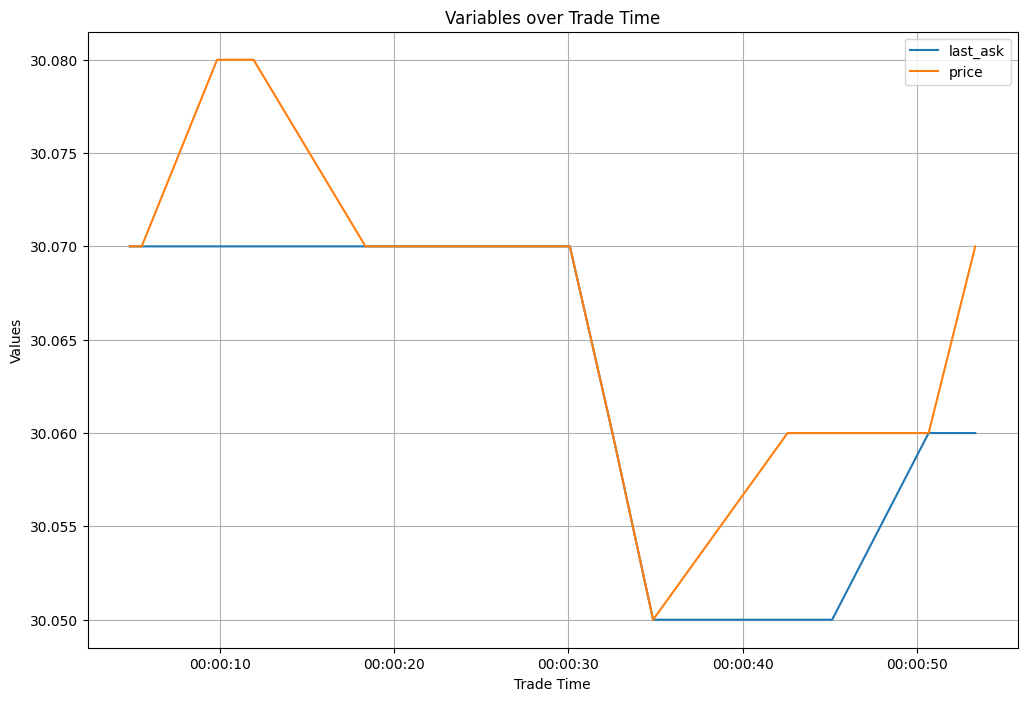

In [7]:
data.visualize(datetime(2024, 6, 17), datetime(2024, 6, 17, 0, 1), variables_to_plot=["last_ask", "price"])

Note that here we are going to use our precomputed features and some raw inputs. We are going to drop "target" (use target_one_step_ahead instead).

In [8]:
df_train, df_test = data.train_test_split(train_test_ratio=0.8, cols_to_exclude=['target'])

Train test ratio is 0.8
Train len for DOGE-USDT is 2599456
Test len for DOGE-USDT is 649864
Train len for AVAX-USDT is 1082925
Test len for AVAX-USDT is 270732


### Mixed effects (Fixed effects with both time entity effects and time effects).

In [10]:
# Data preparation 
df_train_pd: pd.DataFrame = df_train.to_pandas()
df_test_pd: pd.DataFrame = df_test.to_pandas()

df_train_pd = df_train_pd.set_index(['symbol', 'trade_time'])
df_test_pd = df_test_pd.set_index(['symbol', 'trade_time'])

df_train_pd = df_train_pd.drop(columns=["is_buyer_maker", "date"]).dropna()
df_test_pd = df_test_pd.drop(columns=["is_buyer_maker", "date"]).dropna()

In [11]:
# Feature selection 
target_column: str = "target_five_step_ahead"
assert target_column in df_train_pd.columns, f"{target_column} not found in train data columns"

scaler = StandardScaler()
X_train: pd.DataFrame = scaler.fit_transform(df_train_pd.drop(target_column, axis=1))

# Feature selection using LASSO
lasso = LassoCV(cv=2).fit(X_train, df_train_pd[target_column])
selector = SelectFromModel(lasso, prefit=True)

# Select important features
selected_features = list(df_train_pd.drop(target_column, axis=1).columns[selector.get_support()])

print(f"Features selected by Lasso: {selected_features}")

train_df = df_train_pd[selected_features + [target_column]]
test_df = df_test_pd[selected_features + [target_column]]

Features selected by Lasso: ['price']


In [12]:
# FE fit 
# Prepare training data
y_train = train_df[target_column]
X_train = train_df[selected_features].assign(const=1)

# Fit fixed-effects model
fe_model = PanelOLS(y_train, X_train, entity_effects=True, time_effects=True)
fe_results = fe_model.fit()
print(fe_results.summary)

# Prepare test data
X_test = test_df[selected_features].assign(const=1)
y_test = test_df[target_column]

# Predict on test data
predictions = fe_results.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Evaluation Metrics:\nMSE: {mse}\nMAPE: {mape}")

                            PanelOLS Estimation Summary                             
Dep. Variable:     target_five_step_ahead   R-squared:                        0.9999
Estimator:                       PanelOLS   R-squared (Between):              1.0000
No. Observations:                 2301472   R-squared (Within):               1.0000
Date:                    Sat, Nov 23 2024   R-squared (Overall):              1.0000
Time:                            19:50:15   Log-likelihood                 1.372e+07
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                   2.345e+08
Entities:                               2   P-value                           0.0000
Avg Obs:                        1.151e+06   Distribution:                 F(1,12539)
Min Obs:                        6.768e+05                                           
Max Obs:                        1.625e+06   F-statistic (robust):